# Aplicacion de las matrices UDV y su efecto en la transformacion

ir al notebook 2_notebook.ipynb para repasar

En el curso, empiezan directamente con la descomposicion $UDV$, sin embargo, veremos primero la descomposicion $A=PDP^{-1}$
y observaremos si se obiene el mismo resultado.

Con la libreria *linalg* de numpy obtenemos facilmente los valores y vectores caracteristicos. Los autovectores estaran dados por los vectores columna de la matriz *autovectores*

### Ejemplo
Dada la matriz A, calcular los autovalores, autovectores, y demostrar graficamente los autovectores obtenidos con la libreria linalg no son afectados por la transformacion

autovalores: [ 8.43717104 -3.43717104]
autovector_0:  [0.78974972 0.61342919]
autovector_1:  [-0.73607922  0.6768954 ]


Text(0.5, 1.0, 'autovector_0')

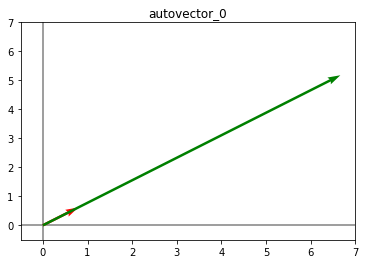

In [31]:
import numpy as np
import matplotlib.pyplot as plt

%run "../Funciones/graficarVectores1.ipynb"

A = np.array([[3, 7], [5, 2]])
autovalores, autovectores = np.linalg.eig(A)
print('autovalores:', autovalores)
print('autovector_0: ', autovectores[:,0])
print('autovector_1: ', autovectores[:,1])

graficarVectores([autovectores[:,0], A.dot(autovectores[:,0])], cols=['red','green'])
plt.xlim(-0.5,7)
plt.ylim(-0.5,7)
plt.title('autovector_0')


Text(0.5, 1.0, 'autovector_1')

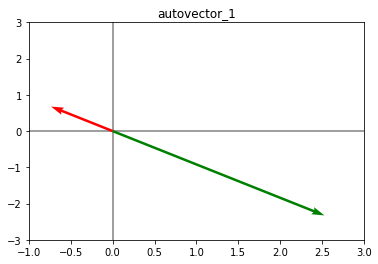

In [30]:

graficarVectores([autovectores[:,1], A.dot(autovectores[:,1])], cols=['red','green'])
plt.xlim(-1,3)
plt.ylim(-3,3)
plt.title('autovector_1')

Hemos demostrado que los vectores generados con la libreria numpy son en realidad vectores caracterisiticos

### Ejemplo. 

Dada la matriz del ejemplo anterior, demostrar que $A=PDP^{-1}$


In [60]:
import numpy as np

print('matriz diagonal')
D = np.diag(autovalores)
print(D)

P = autovectores
inv_P = np.linalg.inv(P)

A_calc = P.dot(D).dot(inv_P)
print(A_calc)


matriz diagonal
[[ 8.43717104  0.        ]
 [ 0.         -3.43717104]]
[[3. 7.]
 [5. 2.]]


In [36]:
print(inv_P)

[[ 0.68642961  0.74644704]
 [-0.62206946  0.80087351]]


## Ejemplo

Hallar la transformacion de A sobre el circulo unitario

[[1. 0.]
 [0. 1.]]


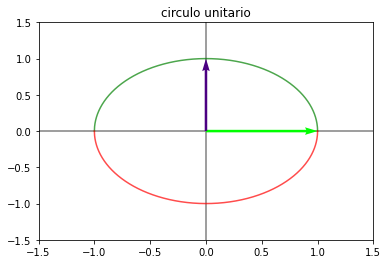

In [61]:
import numpy as np
import matplotlib.pyplot as plt

%run "../Funciones/graficarVectores1.ipynb"
%run "../Funciones/graficarMatriz1.ipynb"

A = np.identity(2)
print(A)

graficarMatriz1(A, title='circulo unitario', cols=['lime', 'indigo'])

plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)

plt.show()


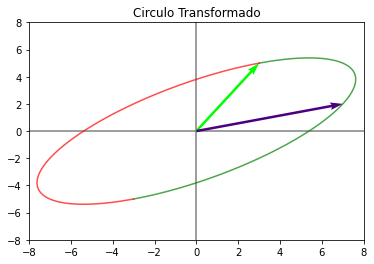

In [62]:

A = np.array([[3, 7], [5, 2]])
graficarMatriz1(A, cols=['lime', 'indigo'])

plt.xlim(-8, 8)
plt.ylim(-8, 8)

plt.show()

### Ejemplo

Ilustrar que la descomposicion en $A=PDP^{-1}$ es equivalente a la tran

autovalores: [ 8.43717104 -3.43717104]
autovector_0:  [0.78974972 0.61342919]
autovector_1:  [-0.73607922  0.6768954 ]


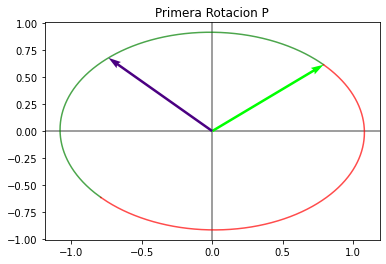

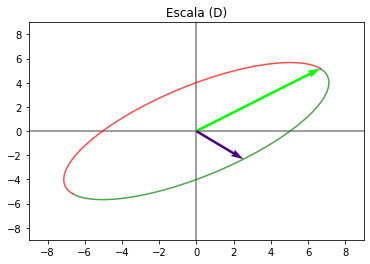

(-9.0, 9.0)

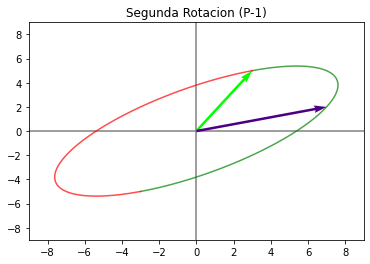

In [68]:
import numpy as np
import matplotlib.pyplot as plt

%run "../Funciones/graficarVectores1.ipynb"
%run "../Funciones/graficarMatriz1.ipynb"

A = np.array([[3, 7], [5, 2]])
autovalores, autovectores = np.linalg.eig(A)
print('autovalores:', autovalores)
print('autovector_0: ', autovectores[:,0])
print('autovector_1: ', autovectores[:,1])

P = autovectores
inv_P = np.linalg.inv(P)
D = np.diag(autovalores)

# Primera Rotacion
graficarMatriz1(P, title='Primera Rotacion P', cols=['lime', 'indigo'])

# Escalamiento
graficarMatriz1(P.dot(D), title= 'Escala (D)', cols=['lime', 'indigo'])
plt.xlim(-9,9)
plt.ylim(-9,9)

# Segunda Rotacion
graficarMatriz1(P.dot(D).dot(inv_P), title= 'Segunda Rotacion (P-1)', cols=['lime', 'indigo'])
plt.xlim(-9,9)
plt.ylim(-9,9)


Como conclusion, el grafico que muestra la segunda rotacion, es igual al obtenido al ejemplo anterior. Signica entonces que la transformacion de A es la transformacion sucesiva de mis matrices P, D y $P^{-1}$.

Se observa que no es exactamente igual al ejemplo mostrado en clase, sin embargo, el resultado es el mismo. A continuacion, realizare el mismo ejemplo, pero con $UDV$

### Ejemplo

Realizar la transformacion sobre la misma matriz, descompiendola en UDV, y comparar los resultados

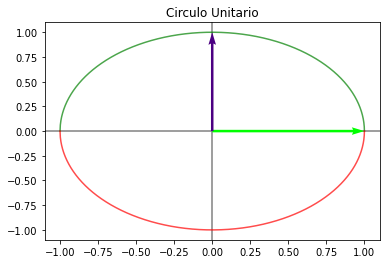

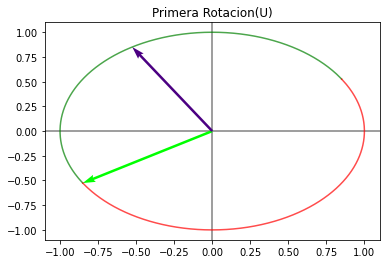

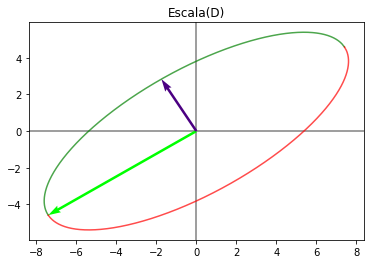

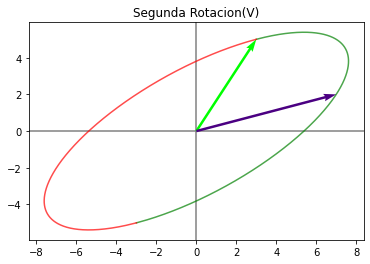

In [76]:
import numpy as np
import matplotlib.pyplot as plt

%run "../Funciones/graficarVectores1.ipynb"
%run "../Funciones/graficarMatriz1.ipynb"

A = np.array([[3, 7], [5, 2]])

U, D, V = np.linalg.svd(A)
D = np.diag(D)


graficarMatriz1(np.identity(2), title='Circulo Unitario', cols=['lime', 'indigo'])
graficarMatriz1(U, title='Primera Rotacion(U)', cols=['lime', 'indigo'])

graficarMatriz1(U.dot(D), title='Escala(D)', cols=['lime', 'indigo'])
plt.xlim(-9,9)
plt.ylim(-9,9)

graficarMatriz1(U.dot(D).dot(V), title='Segunda Rotacion(V)', cols=['lime', 'indigo'])
plt.xlim(-9,9)
plt.ylim(-9,9)


In [74]:
D = np.diag(D)
print(D)

[[8.71337969 0.        ]
 [0.         3.32821489]]


In [69]:
A_calc = U.dot(D).dot(V)

print(np.linalg.det(inv_P))

1.014085200723411
